In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from scipy import stats # При работе со статистикой



# Задание

## 1. Загрузите файл HR.csv в pandas dataframe

In [3]:
df = pd.read_csv('HR.csv')
df.head(10000)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
9995,0.93,0.79,5,241,4,0,0,0,marketing,high
9996,0.97,0.55,4,166,3,1,0,0,accounting,high
9997,0.64,0.53,3,216,3,0,0,0,accounting,high
9998,0.62,0.64,4,185,2,0,0,0,IT,medium


## 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.104

<AxesSubplot:>

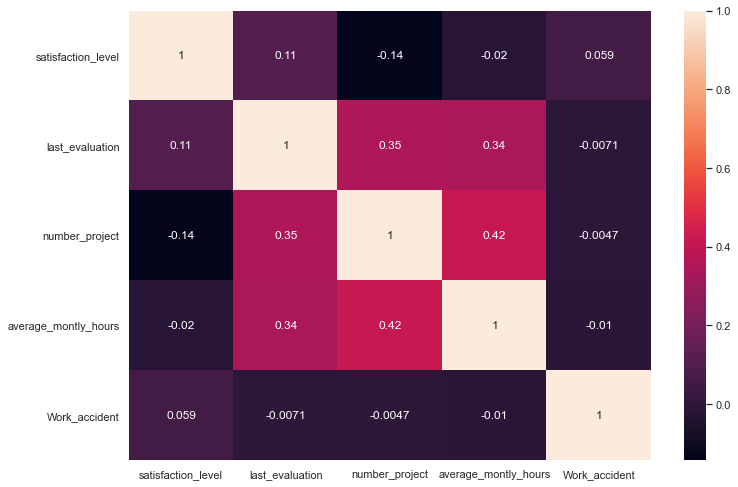

In [5]:
df_corr = df.drop(df.columns[[4,6,7,8]], axis = 1) # все качественные показатели отбрасываем 
sns.set(rc = {'figure.figsize': (11.7, 8.27)})
sns.heatmap(df_corr.corr(), annot = True)

##### Количество проектов, выполненное за время работы и среднее количество часов на рабочем месте оказались двумя самыми скореллированными величинам

##### Наименее скоррелированными оказались количество проктов выполненных за время и количество несчастных случаев

## 4. Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [6]:
df[['department', 'salary']].groupby('department').count()

,salary
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


## 5. Показать распределение сотрудников по зарплатам

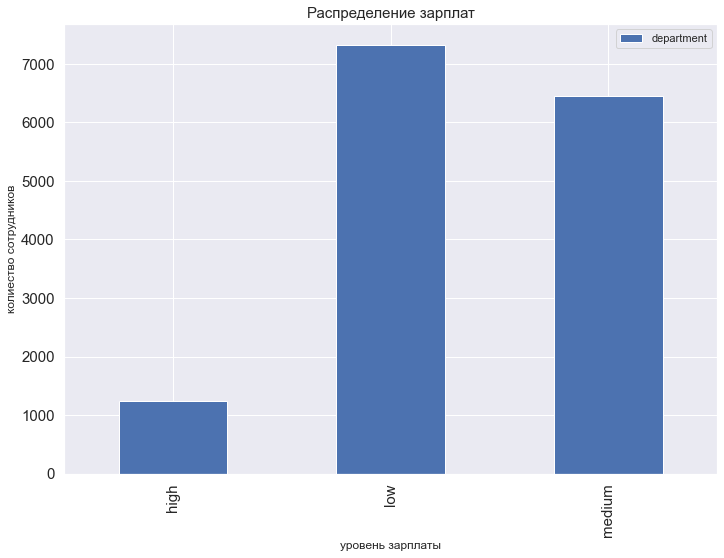

In [7]:
df[['department','salary' ]].groupby('salary').count().plot(kind = 'bar',
            xlabel = 'уровень зарплаты',ylabel = 'колиество сотрудников',
           title ='Распределение зарплат', fontsize = 15).title.set_size(15)

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте

<AxesSubplot:xlabel='department,salary'>

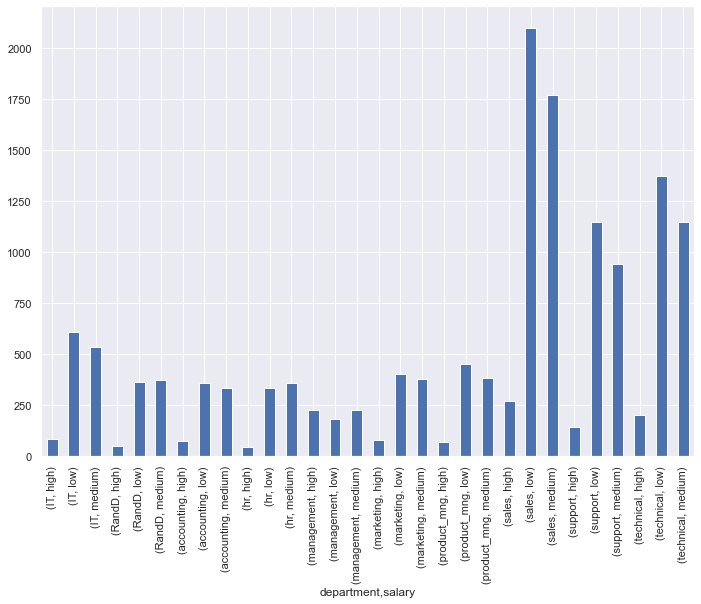

In [8]:
df.groupby(['department', 'salary']).size().plot(kind = 'bar')

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом

In [9]:
df_low = df[['average_montly_hours', 'salary']].loc[df.salary == 'low']
df_high = df[['average_montly_hours', 'salary']].loc[df.salary == 'high']

<AxesSubplot:ylabel='Frequency'>

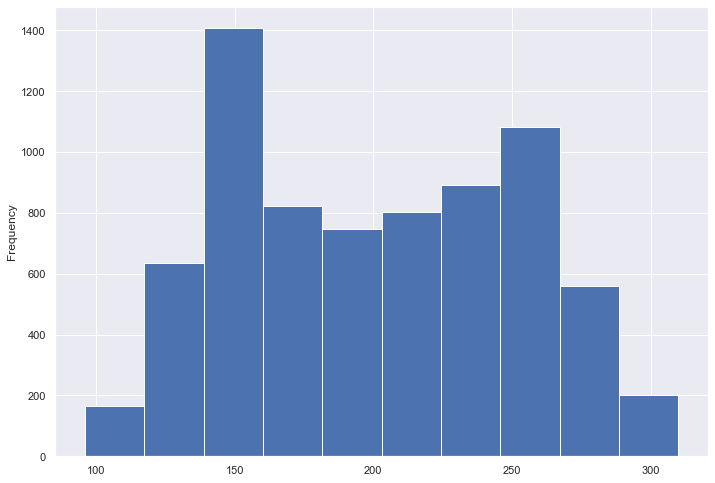

In [10]:
df_low['average_montly_hours'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

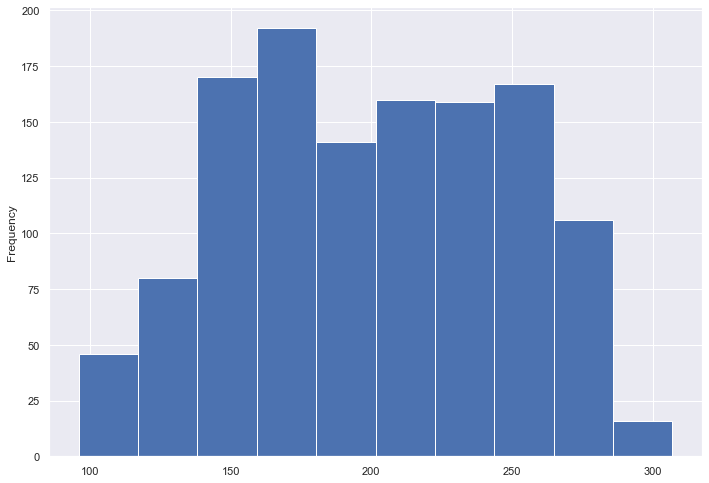

In [11]:
df_high['average_montly_hours'].plot(kind = 'hist')

In [12]:
t, p_value = stats.ttest_ind(df_low['average_montly_hours'], df_high['average_montly_hours'] )
t, p_value

(0.7288680398062308, 0.4661023478267259)

#### p_value  большое, поэтому основную гипотезу о равенстве двух выборок, то есть о том, что выборки отличаются в силу случаных ошибок, принимаем

## 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)

In [35]:
df_empl = df.loc[df['left'] == 0] # сотрудник всё еще работает
df_unempl = df.loc[df['left'] == 1] # сотрудни уволился
df_unempl.head(50)
print('Доля сотрудников с повышением за последние 5 лет, среди уволившихся сотрудников: ',
      np.round( len(df_unempl.loc[df_unempl['promotion_last_5years'] == True])/len(df_unempl) * 100, 2), '%')


Доля сотрудников с повышением за последние 5 лет, среди уволившихся сотрудников:  0.53 %


In [36]:
print('Доля сотрудников с повышением за последние 5 лет, среди не уволившихся сотрудников: ',
      np.round( len(df_empl.loc[df_empl['promotion_last_5years'] == True])/len(df_empl) * 100, 2), '%')


Доля сотрудников с повышением за последние 5 лет, среди не уволившихся сотрудников:  2.63 %


In [47]:
print('средняя степень удовлетворённости среди не уволившихся:',
      np.round(df_empl['satisfaction_level'].mean(),2))

средняя степень удовлетворённости среди не уволившихся: 0.67


In [48]:
print('средняя степень удовлетворённости среди уволившихся:',
      np.round(df_unempl['satisfaction_level'].mean() , 2))

средняя степень удовлетворённости среди уволившихся: 0.44


In [49]:
print( 'Среднее количество проектов среди не уволившихся сотрудников: ',
      np.round(df_empl['number_project'].mean(), 2) )

Среднее количество проектов:  3.79


In [50]:
print( 'Среднее количество проектов среди уволившихся сотрудников: ',
      np.round(df_unempl['number_project'].mean(), 2) )

Среднее количество проектов среди уволившихся сотрудников:  3.86


## 9 Модель LDA

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [52]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [53]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]
y = df['left']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [56]:
X_const.shape

(10499, 8)

In [57]:
X[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [58]:
model = sm.OLS(y_train, X_const)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   left   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     366.6
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:30:11   Log-Likelihood:                -4786.6
No. Observations:               10499   AIC:                             9589.
Df Residuals:                   10491   BIC:                             9647.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.47

#### Качество модели довольно низкое, так как коэффициент детерминации невысокий 0.197